In [1]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_l"

sam = sam_model_registry[MODEL_TYPE](checkpoint='sam_vit_l_0b3195.pth')
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-23): 24 x Block(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1024, out_features=4096, bias=True)
          (lin2): Linear(in_features=4096, out_features=1024, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [14]:
import cv2
from matplotlib import pyplot as plt

mask_generator = SamAutomaticMaskGenerator(sam, pred_iou_thresh=0.95)
image_bgr = cv2.imread('cv_sample.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

In [12]:
result.sort(key=lambda x: x['area'], reverse=True)

In [13]:
result[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 560486,
 'bbox': [0, 7, 1199, 783],
 'predicted_iou': 1.0527664422988892,
 'point_coords': [[1181.25, 731.96875]],
 'stability_score': 0.972789466381073,
 'crop_box': [0, 0, 1200, 794]}

In [10]:
import pickle
with open('result.pkl', 'wb') as f:
    pickle.dump(result, f)

In [40]:
from PIL import Image
im = Image.open('cv_sample.png')
im = im.crop((result[0]['bbox'][0], result[0]['bbox'][1], result[0]['bbox'][0]+result[0]['bbox'][2], result[0]['bbox'][1]+result[0]['bbox'][3]))
im.show()

In [20]:
image_rgb.shape

(415, 1024, 3)

ValueError: zero-size array to reduction operation minimum which has no identity

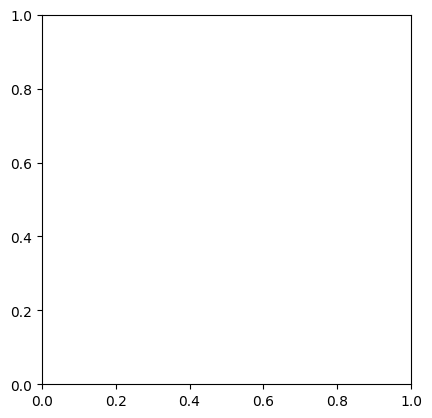

In [14]:
# show the image cropped using coordinates in bbox
# bbox in XYWH
plt.imshow(image_rgb[result[0]['bbox'][0]:result[0]['bbox'][0]+result[0]['bbox'][2], result[0]['bbox'][1]:result[0]['bbox'][1]+result[0]['bbox'][3]])